In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/HOME/ncs/data/cmip6/canesm5/cmip6_experiments/cmip6_experiment.txt', delimiter='|')
#drop last row with header
df.drop(df.tail(1).index,inplace=True)
# Drop some useless columns
df.drop(labels=[df.columns[0], df.columns[7], df.columns[-1], df.columns[-2], df.columns[-3]], axis=1, inplace=True)

# Strip whitespace, drop empty rows
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df[df.columns[9]].replace('', np.nan, inplace=True)
df.dropna(inplace=True)

In [3]:
df.columns

Index([' Run ID               ', ' Activity ID ', ' Source ID     ',
       ' Experiment ID               ', ' sub Experiment ID ',
       ' Variant Label ', ' Parent Run ID   ', ' Branch Time in Parent ',
       ' Branch Time in Child ', ' NC start:stop year ', ' user   ', ' hall '],
      dtype='object')

In [4]:
df_se = df[df.columns[9]].str.split(':', expand=True)#.rename(columns=['start', 'end'])
df_se.columns = ['start', 'end']
df_se['sim_length'] = df_se['end'].astype(int) - df_se['start'].astype(int) + 1
dfm = df.join(df_se)
dfm.drop(labels=['start', 'end'], axis=1, inplace=True)

In [5]:
ys = np.array(ys)
ye = np.array(ye)

sim_length = ye - ys + 1

NameError: name 'ys' is not defined

(array([0.00e+00, 1.00e+00, 1.10e+03, 1.20e+03, 0.00e+00, 0.00e+00,
        0.00e+00, 5.60e+01, 2.20e+01, 0.00e+00, 4.10e+01, 4.08e+02,
        7.50e+01, 3.63e+02]),
 array([  0,   1,   2,  10,  20,  30,  40,  50,  60,  70,  80,  86, 100,
        165, 200]),
 <a list of 14 Patch objects>)

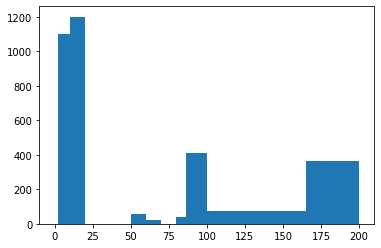

In [6]:
plt.hist(dfm['sim_length'], bins=[0,1,2,10,20,30,40,50,60,70,80,86,100,165,200])

In [7]:
dfm['sim_length'].sum()

173584

(0, 20)

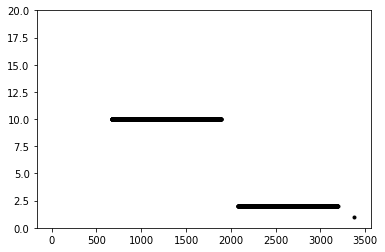

In [8]:
plt.plot(dfm['sim_length'], 'k.')
plt.ylim([0, 20])

In [9]:
plt.semilogy(dfm['sim_length'].cumsum(), sim_length, 'k.')
plt.gca().axhline(y=85, color='k', alpha=0.4, zorder=0)
plt.gca().axhline(y=165, color='k', alpha=0.4, zorder=0)
plt.gca().axhline(y=1, color='k', alpha=0.4, zorder=0)
plt.gca().axhline(y=10, color='k', alpha=0.4, zorder=0)


NameError: name 'sim_length' is not defined

In [10]:
dfm.groupby(dfm.columns[3]).sum().sort_values(by='sim_length', ascending=False)

sim_length
 Experiment ID                           
omip1                               14310
omip1-spinup                        12000
dcppA-hindcast                      11400
historical                           9075
hist-GHG                             8550
...                                   ...
piClim-ghg                             50
piClim-control                         50
piClim-anthro                          50
piClim-aer                             50
piClim-4xCO2                           50

[104 rows x 1 columns]

In [289]:
help(dfm.groupby)

Help on method groupby in module pandas.core.generic:

groupby(by=None, axis=0, level=None, as_index=True, sort=True, group_keys=True, squeeze=False, observed=False, **kwargs) method of pandas.core.frame.DataFrame instance
    Group DataFrame or Series using a mapper or by a Series of columns.
    
    A groupby operation involves some combination of splitting the
    object, applying a function, and combining the results. This can be
    used to group large amounts of data and compute operations on these
    groups.
    
    Parameters
    ----------
    by : mapping, function, label, or list of labels
        Used to determine the groups for the groupby.
        If ``by`` is a function, it's called on each value of the object's
        index. If a dict or Series is passed, the Series or dict VALUES
        will be used to determine the groups (the Series' values are first
        aligned; see ``.align()`` method). If an ndarray is passed, the
        values are used as-is determine t